# Linear Regression

## Import Basic Libraries 

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import seaborn as sns 

## Download Data

In [2]:
vg = pd.read_csv("video_games_sales.csv") #vg = video games 
vg.info() #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


The highest video game sales occurred in North America, with the assumption that consumers in the U.S. were one of the main buyers. North American sales make up about half of the global sales.

In [3]:
vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
vg.columns.tolist()

['Sales Rank',
 'name',
 'platform',
 'year',
 'genre',
 'publisher',
 'North American Sales (in millions)',
 'European Sales (in millions)',
 'Japan Sales (in millions)',
 'Other Sales (in millions)',
 'Global Sales (in millions)']

### Handle Missing Values

In [4]:
# Handle missing values using impute_vals function
import pandas as pd
import numpy as np
import re
    
def impute_vals(df):
    
    missing_loc = df.isna()
    for col in df.columns:
        missing = df.loc[missing_loc[col] == True]
        if missing.empty:
            continue
        
        if col == 'year':
            yr_avgs = df[['year','platform']].groupby('platform').mean()
            np.rint(yr_avgs, out = yr_avgs)
            yr_avgs = yr_avgs.to_dict()
            missing.loc[:,'year'] = missing['platform']
            missing.replace(yr_avgs, inplace = True)
            df.update(missing)
 
            yr_fmts = r'(19|20)(\d{2})|(?<=\s)([0-2]|[8-9])[0-9](?=\Z|\s)|(?<=2k|2K)(\d+)'
            matches = list(map(lambda x: re.search(yr_fmts, x), missing['name']))
            matches = pd.Series(data = map(lambda x: x.group() if x != None else None,
                                           matches), index = missing.index, name = 'year').dropna()
            matches = matches.astype('int64').sub(1)
            matches.loc[(matches < 100) & (matches > 79)] += 1900
            matches.loc[matches < 79] += 2000
            df.update(matches)
            
            df.at[2497, 'year'] = 2002
            df.at[12015, 'year'] = 2003
        
        if col == 'publisher':
            missing.loc[:, col] = 'unknown'
            df.update(missing)
            
    return df
            
# drop unnecessary columns, call impute_vals
vg.drop(columns = ['European Sales (in millions)',
                    'Japan Sales (in millions)',
                    'Other Sales (in millions)',
                    'Global Sales (in millions)'], 
                    inplace = True)
vg = impute_vals(vg)
vg.all()

C:\Users\17722\AppData\Local\Temp\ipykernel_10816\1016878455.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['PS2' 'PS2' 'Wii' 'PS2' '2600' 'X360' 'GBA' 'Wii' 'Wii' 'Wii' 'PC' 'PS3'
 'PS' 'Wii' 'PSP' '2600' '2600' 'PS2' 'XB' 'PS2' 'PS' 'GB' 'X360' '2600'
 'PS2' 'PS3' 'PS3' 'PS2' 'XB' 'Wii' 'PS3' 'X360' 'PSP' 'PS2' 'X360' 'PSP'
 'Wii' 'GBA' 'DS' 'X360' 'GBA' 'PS3' 'PS2' 'DS' 'XB' 'Wii' 'X360' 'PS2'
 'XB' 'XB' 'GC' '2600' 'X360' 'PS3' '2600' 'Wii' '2600' 'XB' '2600' 'X360'
 '2600' 'X360' 'Wii' 'PC' '3DS' 'PS2' 'PS3' 'PS2' 'PS3' '2600' 'PSP' 'XB'
 'DS' 'GBA' 'X360' 'PC' 'Wii' 'N64' 'PS2' 'X360' '2600' 'PS2' 'XB' '2600'
 'DS' 'PS' 'PSV' 'GC' '3DS' 'GC' 'PS2' 'XB' 'GC' 'GC' 'GBA' '2600' 'X360'
 '2600' 'PSP' 'PS3' 'PS3' 'PS2' 'PS2' 'PC' 'PS3' 'PSP' 'Wii' 'Wii' 'Wii'
 'PS2' 'PS2' 'PS3' 'PC' 'PS2' '2600' '2600' 'XB' 'PSP' 'PS3' 'N64' 'PC'
 'PC' '3DS' 'X360' 'Wii' 'X360' 'PS' 'X360' 'PS2' 'GBA' 'PS3' 'PS2' 'PS2'
 'PS3

Sales Rank                             True
name                                   True
platform                               True
year                                   True
genre                                  True
publisher                              True
North American Sales (in millions)    False
dtype: bool

In [5]:
vg.head()

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27


## Encode Categorical Variables / Prepare Features and Target

In [6]:
# Define features and target
X = vg[['Sales Rank', 'platform', 'year', 'genre', 'publisher']]
y = vg['North American Sales (in millions)']

In [7]:
# Encode categorical variables

# One-hot encode low-cardinality features (creates a column per category, values become True/False)
X = pd.get_dummies(X, columns=['platform', 'genre'], drop_first=True)


# Target encode high-cardinality variable 'publisher' (replace publisher name with the mean North American Sales value for that publisher)

# get the mean of North American sales for each publisher
publisher_target_mean = X.join(y).groupby('publisher')['North American Sales (in millions)'].mean()
# Compute global mean of North American Sales in training set
global_mean = y.mean()

# Map the target encoding to X, fill missing with global mean instead of publisher mean
X['publisher_encoded'] = X['publisher'].map(publisher_target_mean).fillna(global_mean)

# Drop original 'publisher' column in both train and test
X = X.drop(columns=['publisher'])

In [8]:
X.head()

,Sales Rank,year,platform_3DO,platform_3DS,platform_DC,platform_DS,platform_GB,platform_GBA,platform_GC,platform_GEN,...,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy,publisher_encoded
0,1,2006.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.161977
1,2,1985.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1.161977
2,3,2008.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1.161977
3,4,2009.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.161977
4,5,1996.0,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,1.161977


In [9]:
## Baseline Linear Regression

In [10]:
# Split into Train/Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Fit Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)


# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression for North American Sales:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Baseline Linear Regression for North American Sales:
Mean Squared Error: 0.926
R^2 Score: 0.139


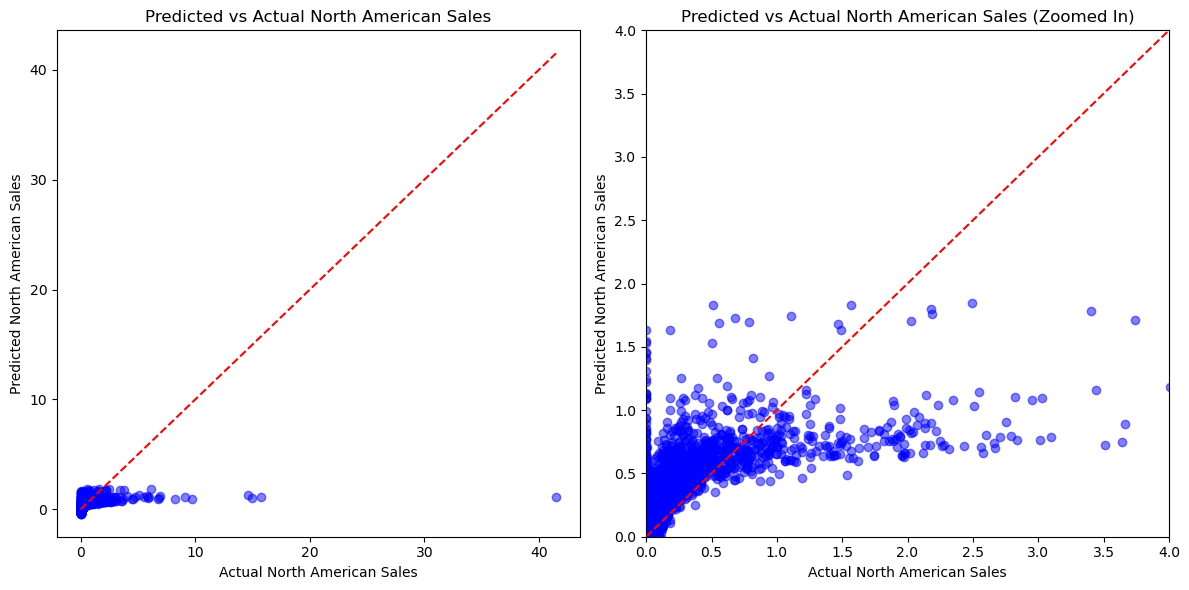

In [12]:
# Plot Predicted vs Actual values
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual North American Sales")
plt.ylabel("Predicted North American Sales")
plt.title("Predicted vs Actual North American Sales")

# Zoom in on typical sales range (adjust as needed)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual North American Sales")
plt.ylabel("Predicted North American Sales")
plt.title("Predicted vs Actual North American Sales (Zoomed In)")
plt.xlim(0, 4)   # show only up to 4 million units
plt.ylim(0, 4)

plt.tight_layout()
plt.show()

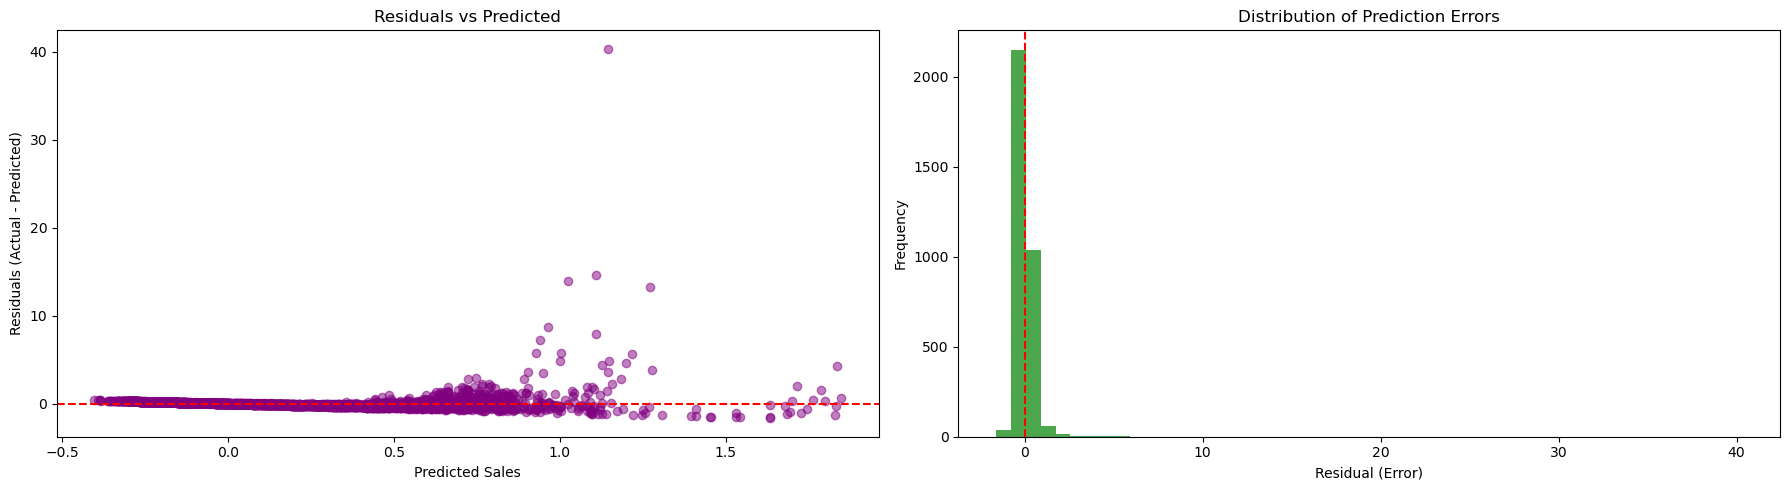

In [13]:
#residuals and distribution of prediction errors

# Compute residuals
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Residuals vs Predicted
axes[0].scatter(y_pred, residuals, alpha=0.5, color='purple')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Sales")
axes[0].set_ylabel("Residuals (Actual - Predicted)")
axes[0].set_title("Residuals vs Predicted")

# Histogram of residuals
axes[1].hist(residuals, bins=50, color='green', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_xlabel("Residual (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Prediction Errors")

plt.tight_layout()
plt.show()


In [14]:
# Cross-Validation Evaluation 
from sklearn.model_selection import cross_val_score, KFold

model = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation:")
print(f"Average MSE: {abs(cv_mse.mean()):.3f}")
print(f"Average R^2: {cv_r2.mean():.3f}")


North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation:
Average MSE: 0.733
Average R^2: -354.593


Mean R^2 is a very large negative number, showing that some folds are predicting terribly, far worse than just predicting the mean North American Sales. One potential cause for this, which can be easily addressed, is extreme skew in the target variable. Game Sales data is likely to be heavy-tailed as certain (extremely popular) games dominate sales totals, while others sell very few. Some folds might randomly include or exclude these blockbuster titles, making variance explode. We will check for skew and address it with a log transformation. 

## Try Log Transformation of Target on Baseline Linear Regression

In [15]:
# check global sales variable for skew

print(y.describe())
#make histogram of y

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: North American Sales (in millions), dtype: float64


In [16]:
#log transform the target
y_log = np.log1p(y)

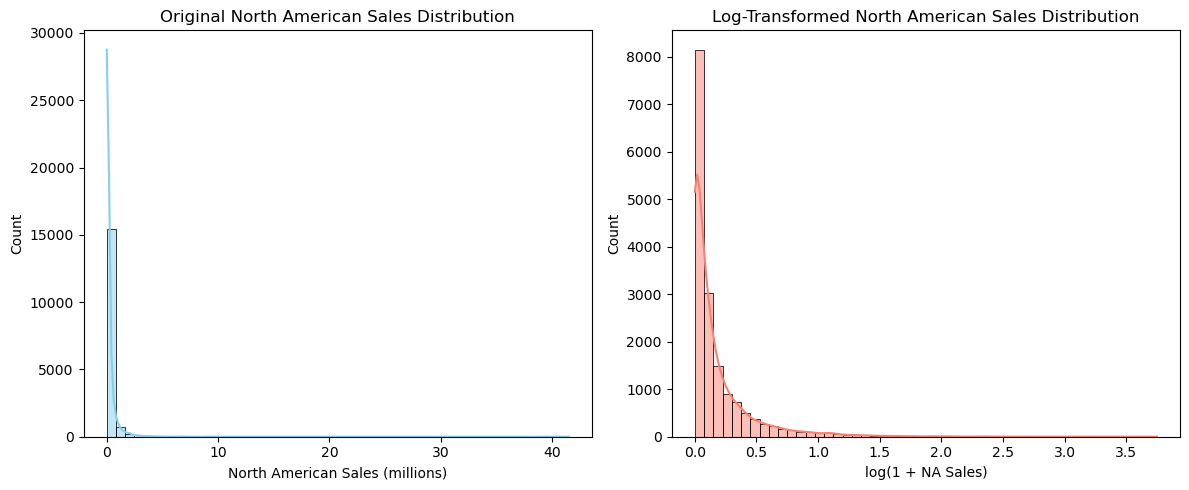

In [17]:
# Visualize transformation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot original vs. log-transformed sales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.histplot(y, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Original North American Sales Distribution")
axes[0].set_xlabel("North American Sales (millions)")
axes[0].set_ylabel("Count")

# Log-transformed distribution
sns.histplot(y_log, bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Log-Transformed North American Sales Distribution")
axes[1].set_xlabel("log(1 + NA Sales)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [18]:
# Fit the baseline linear regression model with the log-transformed y 
model = LinearRegression()
model.fit(X, y_log)

# Predict and inverse-transform
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression with Log-Transformed Target:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Linear Regression with Log-Transformed Target:
Mean Squared Error: 0.929
R^2 Score: 0.137


In [19]:
# Cross-Validation Evaluation with log-transformed y
model = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(model, X, y_log, cv=5, scoring='r2')
cv_mse = cross_val_score(model, X, y_log, cv=5, scoring='neg_mean_squared_error')

print("North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation with log-transformed Target:")
print(f"Average MSE: {abs(cv_mse.mean()):.3f}")
print(f"Average R^2: {cv_r2.mean():.3f}")


North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation with log-transformed Target:
Average MSE: 0.080
Average R^2: -90.336
